
# Machine Learning project - Velja Joan - 3142452



This dataset is composed of 1400 samples with 30 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 4 possible values for the labels. The remaining columns are numeric
features.

Your task is the following: you should compare the performance of a Support-
Vector Machine (implemented by sklearn.svm.LinearSVC) with that of Logistic
Regression (implemented by sklearn.linear_model.LogisticRegression). Try to
optimize both algorithms' parameters and determine which one is best for this
dataset. At the end of the analysis, you should have chosen an algorithm and its
optimal set of parameters: write this choice explicitly in the conclusions of
your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).

In [1]:
#pip install plotly
# Install if not already installed for interactive and 3d graphs

## Importing libraries

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

try:
    import plotly.express as px # Library I used to plot interactive graphs
except:
    pass
     
import matplotlib.pyplot as plt
import time
import warnings
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning 

warnings.filterwarnings(action='ignore', category=ConvergenceWarning) # To ignore convergence warnings
warnings.filterwarnings(action='ignore', category=FitFailedWarning) # To ignore fit warnings

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


## Importing the data

In [3]:
dataset = pd.read_csv("mldata_0023142452.csv")

dataset.head()

Unnamed: 0  label  feature_1  feature_2  feature_3  feature_4  feature_5  \
0           0      2  -6.307388  -6.580509  -1.738467  -1.684571  -2.639420   
1           1      2  11.950137   9.191427  12.549269  10.262418  10.518235   
2           2      2   2.216258   7.898900  11.703850   3.807899   3.832308   
3           3      3 -10.289963  -4.672183  -4.560681 -11.446678 -10.279623   
4           4      2   2.945383   3.001723   8.573177   5.133476   7.931142   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0  -3.333513   0.293647   2.245474  ...   -0.987602   -3.430605   -2.818698   
1  18.227563  13.312902  11.909541  ...   11.693572   14.048207    9.794961   
2   2.219999   6.341650  10.608763  ...    8.000624    7.625560   -0.908649   
3   0.198768  -6.788185  -8.880043  ...   -9.858906    1.657994   -9.185046   
4  -4.652173   5.373283  10.057306  ...    7.760484   -4.850446    3.621486   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0   -1.391962   -0.607260   -1.558291    0.198819   -0.567054   -3.265654   
1   10.576997   10.196525   15.283945    7.901919   10.064915   11.732845   
2    8.177704    7.308522    8.956721    7.047050   10.089483    2.916613   
3  -14.695185  -19.790478  -15.245788   -4.383585  -11.192429   -8.332233   
4    6.442657    4.102786    7.315632    2.033427    4.708101    8.089781   

   feature_30  
0    0.297228  
1    6.788242  
2    4.498638  
3  -10.442897  
4    6.089904  

[5 rows x 32 columns]

In [4]:
dataset = dataset.drop(dataset.columns[0], axis = 1) #Drop the unnecessary indexing column

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       1400 non-null   int64  
 1   feature_1   1400 non-null   float64
 2   feature_2   1400 non-null   float64
 3   feature_3   1400 non-null   float64
 4   feature_4   1400 non-null   float64
 5   feature_5   1400 non-null   float64
 6   feature_6   1400 non-null   float64
 7   feature_7   1400 non-null   float64
 8   feature_8   1400 non-null   float64
 9   feature_9   1400 non-null   float64
 10  feature_10  1400 non-null   float64
 11  feature_11  1400 non-null   float64
 12  feature_12  1400 non-null   float64
 13  feature_13  1400 non-null   float64
 14  feature_14  1400 non-null   float64
 15  feature_15  1400 non-null   float64
 16  feature_16  1400 non-null   float64
 17  feature_17  1400 non-null   float64
 18  feature_18  1400 non-null   float64
 19  feature_19  1400 non-null  

In [6]:
np.unique(dataset["label"]) #Asserting the number of classes in the dataset

array([0, 1, 2, 3])

In [7]:
dataset["label"].value_counts(normalize = True) #Check whether there is unbalance in the labels distribution

2    0.258571
0    0.248571
1    0.247143
3    0.245714
Name: label, dtype: float64

As we can see, there are no datapoints with missing features. In addition to that, all features are float64 and ranging from 0 to 3, hence not requiring encoding for categorical data and such. The labels are pretty much uniformely distributed, so there is no need for stratified sampling either.

In [8]:
dataset.describe()

label    feature_1    feature_2    feature_3    feature_4  \
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000   
mean      1.501429     0.952754     1.393814     1.432333     1.871925   
std       1.113308     8.175860     6.889461     7.851315     7.431648   
min       0.000000   -35.861652   -26.346434   -38.218040   -25.636670   
25%       1.000000    -4.323246    -2.834991    -3.441528    -3.059449   
50%       2.000000     1.147006     1.433649     1.627198     2.105772   
75%       2.000000     6.122125     5.811585     6.418312     6.993491   
max       3.000000    30.749730    27.098132    28.432496    27.640209   

         feature_5    feature_6    feature_7    feature_8    feature_9  ...  \
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000  ...   
mean      1.412855     1.530936     1.492572     1.269336     2.287758  ...   
std       7.732499     8.245872     7.089227     6.639796     8.670122  ...   
min     -35.661890   -25.141147   -26.004450   -28.977184   -37.914782  ...   
25%      -3.604571    -4.211841    -2.983492    -3.152234    -3.449924  ...   
50%       1.488799     1.656671     1.374987     1.302481     2.471098  ...   
75%       6.567516     7.179655     6.139894     5.539765     8.348196  ...   
max      24.739274    28.033581    27.441121    19.790295    31.070020  ...   

        feature_21   feature_22   feature_23   feature_24   feature_25  \
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000   
mean      1.456540     1.075682     1.463500     1.982670     1.845210   
std       7.715225     8.022109     7.736749     6.845094     7.157837   
min     -31.990268   -29.225265   -28.234069   -27.689142   -29.181726   
25%      -3.510665    -4.038870    -3.525798    -2.471465    -2.847185   
50%       1.632529     0.868874     1.280276     1.996580     2.107045   
75%       6.593686     6.464863     6.440910     6.533724     6.381310   
max      27.050851    27.730019    32.518557    23.468995    27.014834   

        feature_26   feature_27   feature_28   feature_29   feature_30  
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000  
mean      2.182762     0.771927     2.348723     1.427501     2.080227  
std       9.111236     6.593377     7.972157     6.930331     6.344859  
min     -40.330927   -26.230036   -38.587409   -26.970779   -29.339682  
25%      -3.752336    -3.334476    -2.780606    -3.221249    -2.190209  
50%       2.345363     0.564083     2.656730     1.619835     2.416525  
75%       8.472867     4.896052     7.915382     6.117391     6.293605  
max      27.970559    29.018133    25.813966    25.466638    21.169702  

[8 rows x 31 columns]

In [9]:
print(f"Standard deviations range from {round(min(dataset.describe().iloc[2,1:]),6)} to {round(max(dataset.describe().iloc[2,1:]),6)}")
print(f"Means range from {round(min(dataset.describe().iloc[1,1:]),6)} to {round(max(dataset.describe().iloc[1,1:]),6)}")

Standard deviations range from 6.344859 to 9.111236
Means range from 0.320047 to 2.348723


Data might benefit standardization: there are oscillations in standard deviations and means, both being different from 1 and 0 respectively. We will carry on the analysis making a distinction between standardized and not standardized.

In [10]:
labels = dataset["label"]
features = dataset.drop(dataset.columns[0], axis = 1) # Divide the dataset into features and target

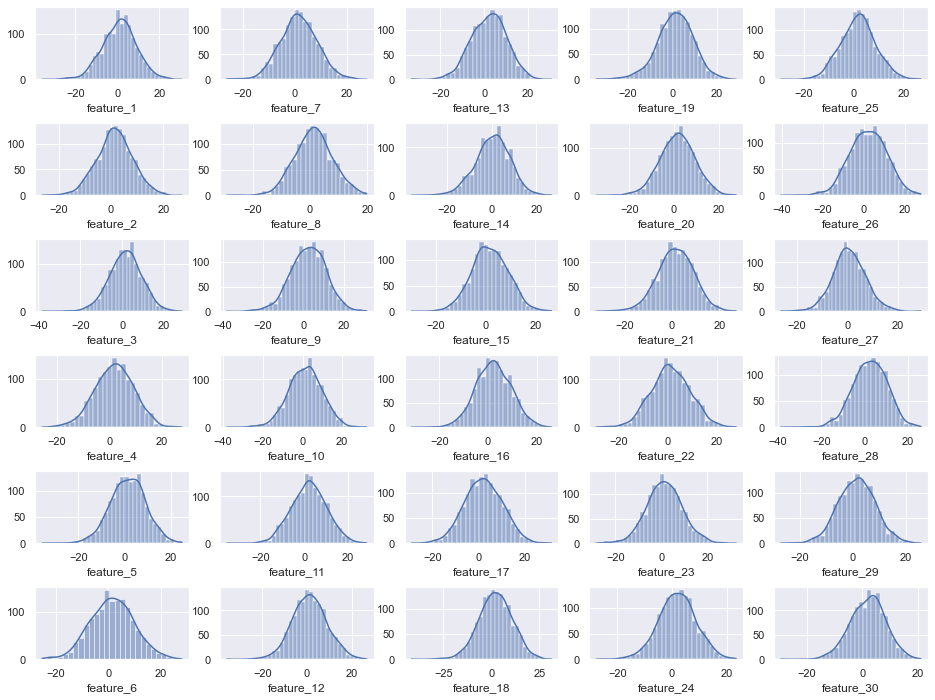

In [11]:
sns.set_theme(style="darkgrid") # Plotting the data to assert odd / particular distributions among it
fig, axs = plt.subplots(6, 5, figsize=(16, 12))
plt.subplots_adjust(hspace = 0.6)
c = -1

for i in range (len(features.columns)):
    if i % 6 == 0:
        c += 1
    sns.histplot(data=features, x = features.iloc[:,i], kde = True, ax = axs[ i % 6 , c]).set(ylabel = None)

plt.show()

## Divide data into Train & Test splits

In [12]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(features,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state = 1) 

In [13]:
train_x.shape, test_x.shape

((1120, 30), (280, 30))

## Gaining insights from the data

In [14]:
corr_matrix = features.corr()

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

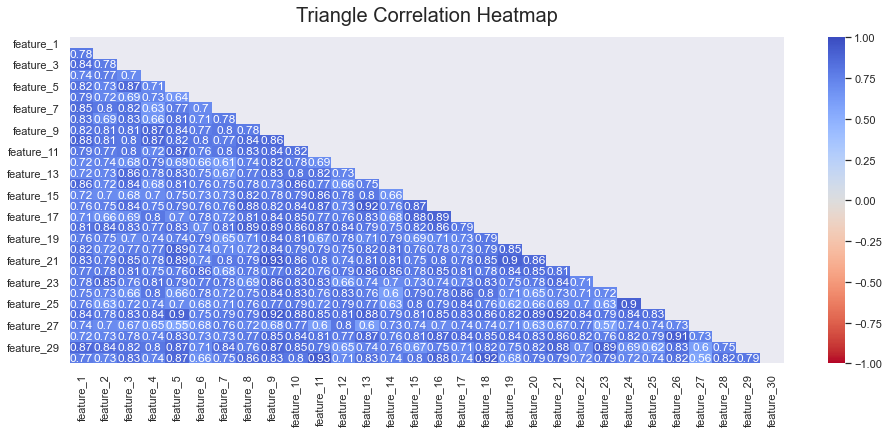

In [15]:
plt.figure(figsize=(16, 6)) #Plotting the correlation matrix, to assert eventual correlation among features

mask = np.triu(np.ones_like(corr_matrix))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm_r')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':20}, pad=16)

As we can se from the heatmap above, there is a lot of correlation among features, hinting at potential dimensionality reduction as a fix of this issue.

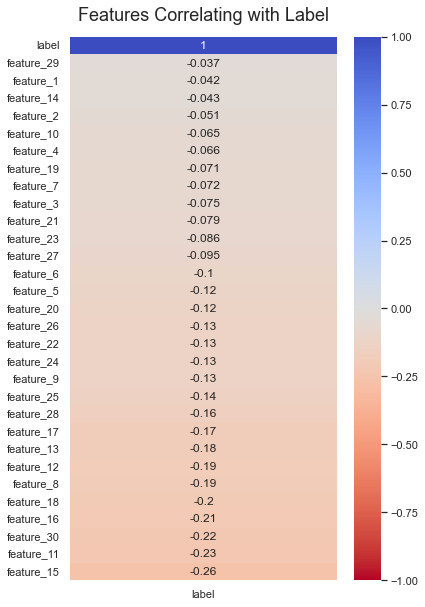

In [16]:
plt.figure(figsize=(6, 10))
heatmap = sns.heatmap(dataset.corr()[['label']].sort_values(by= 'label', ascending = False), vmin=-1, vmax=1, annot=True, cmap='coolwarm_r')
heatmap.set_title('Features Correlating with Label', fontdict={'fontsize':18}, pad=16);

As we can see, the label is negatively correlated to all the features, but there are no standouts among them.

In [17]:
from sklearn.preprocessing import StandardScaler

# We will use the training set mean and std deviation for standardization in order not to allow 
# for bias towards our test set, which has to be kept unseen.    

sc = StandardScaler()
prep_train_x = sc.fit_transform(train_x)
prep_test_x = sc.transform(test_x)


## Attempt at PCA dimensionality reduction

In [18]:
from sklearn.decomposition import PCA

pca = PCA().fit(prep_train_x)
xpl = np.cumsum(pca.explained_variance_ratio_)
df = pd.DataFrame(xpl, columns = ["Explained Variance"])
df["# Components"] = np.arange(1,len(xpl) + 1,dtype=int)
colnames = df.columns

try:
    p = px.line(df, x=colnames[1], y =colnames[0], title = "PCA: Explained variance per number of components")
except:
    p = sns.plotline(xpl).set_title("PCA: Explained variance per number of components")
    
p.show()

We can see that with 9 principal components, we achieve 95% of the variance, hence we can try to carry out our classification task on a dimensionally reduced dataset too: if the trade-off between the information loss and the computational runtime is convenient, we can say that the reduced model is a good simplification of the dataset.

In [19]:
'''

pca_3d = PCA(n_components = 3)
pc_3d = pca_3d.fit_transform(prep_train_x)
pcdf = pd.DataFrame(pc_3d, columns = ["X1", "X2", "X3"])
pcdf["Label"] = labels.astype(str)
fig = px.scatter_3d(pcdf, x='X1', y='X2', z='X3',
                    color='Label')
fig.show()

'''

'\n\npca_3d = PCA(n_components = 3)\npc_3d = pca_3d.fit_transform(prep_train_x)\npcdf = pd.DataFrame(pc_3d, columns = ["X1", "X2", "X3"])\npcdf["Label"] = labels.astype(str)\nfig = px.scatter_3d(pcdf, x=\'X1\', y=\'X2\', z=\'X3\',\n                    color=\'Label\')\nfig.show()\n\n'

In [22]:
#print(f"The explained variance by a three dimensional model is {np.sum(pca_3d.explained_variance_ratio_)}")

Trying to plot the data in three dimensions to assert any patterns, behaviors of the data. There is not much room for interpretation: as the explained variance states, this type of reduction is not capturing the dataset information to the fullest.
On top of that, the combination of large sample size and lack of evident pattern, make this sort of visual analysis even harder.

In [23]:
pca = PCA(n_components = 9)
transf_train_x = pca.fit_transform(prep_train_x)
transf_test_x = pca.transform(prep_test_x)

In [24]:
transf_train_x.shape, transf_test_x.shape

((1120, 9), (280, 9))


# Model performances

Let us define the function _evaluator_, which will take as arguments the __predicted labels__, the __true labels__ and will take care of the quantitative accuracy analysis.
It will output:

- The SkLearn classification report;

- a confusion matrix (normalized or not, depending on user preferences), which will have on the x-axis label the measures of accuracy, misclassification and runtime (if provided in input).

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import balanced_accuracy_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
    
def evaluator(test_y,
              y_pred,
              labels = ["0", "1", "2", "3"],
              normalize = True,
              runtime = None):
    
    print(classification_report(test_y,y_pred))
    plt.figure(figsize=(10, 7))
    cm = confusion_matrix(test_y, y_pred)
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm / cm.sum(axis=1)[:, np.newaxis]
        cmat = pd.DataFrame(cm)
    else:
        cmat = pd.DataFrame(cm)
    cmat.columns = labels
    plt.title("Confusion Matrix")
    if runtime is None:
        sns.heatmap(cmat, cmap="coolwarm_r", annot=True).set_ylabel("True label")
        plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    else:
        sns.heatmap(cmat, cmap="coolwarm_r", annot=True).set_ylabel("True label")
        plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}; runtime={:0.4f} sec.'.format(accuracy, misclass,runtime))
    plt.show()
    
    return cm

## Support Vector Machine

### Full data - no standardization

In [26]:
svm_pipe = make_pipeline(LinearSVC(dual = False)) # From now on, I will set the parameter _dual_ = False as suggested
                                                  # in the documentation: being the sample set > feature set, the dual
                                                  # formulation is useless and would not even reach convergence.

In [27]:
start = time.process_time() # Initializing runtime. N.B.: this will take into account standardization (if inputted)
                            # and PCA (if inputted) as well, so it's not properly timing the fitting and prediction
                            # time required. From the fact that standardization is a fast process, we can disregard
                            # the time needed to carry out such operation and compare our runtimes without complications.
svm_pipe.fit(train_x, train_y)
svm_pred = svm_pipe.predict(test_x)
runtime = time.process_time() - start

              precision    recall  f1-score   support

           0       0.48      0.57      0.52        65
           1       0.74      0.59      0.66        71
           2       0.53      0.51      0.52        73
           3       0.68      0.73      0.71        71

    accuracy                           0.60       280
   macro avg       0.61      0.60      0.60       280
weighted avg       0.61      0.60      0.60       280



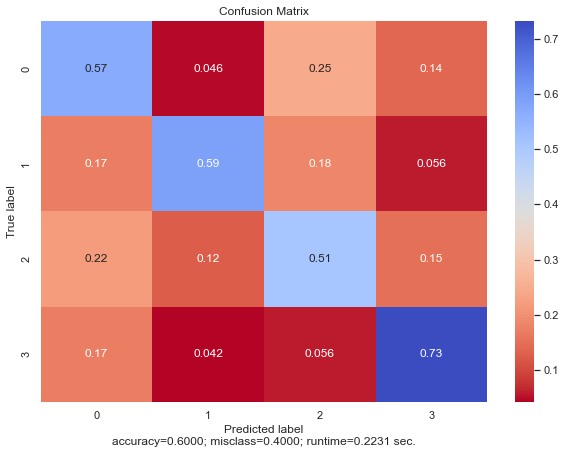

In [28]:
cmsvm = evaluator(test_y, svm_pred, runtime = runtime) # Implementation of _evaluator_ function

### Full data - with standardization

In [29]:
ssvm_pipe = make_pipeline(sc, LinearSVC(dual = False))

In [30]:
start = time.process_time()
ssvm_pipe.fit(train_x, train_y)
ssvm_pred = ssvm_pipe.predict(test_x)
runtime = time.process_time() - start

              precision    recall  f1-score   support

           0       0.49      0.57      0.53        65
           1       0.77      0.61      0.68        71
           2       0.52      0.49      0.51        73
           3       0.65      0.73      0.69        71

    accuracy                           0.60       280
   macro avg       0.61      0.60      0.60       280
weighted avg       0.61      0.60      0.60       280



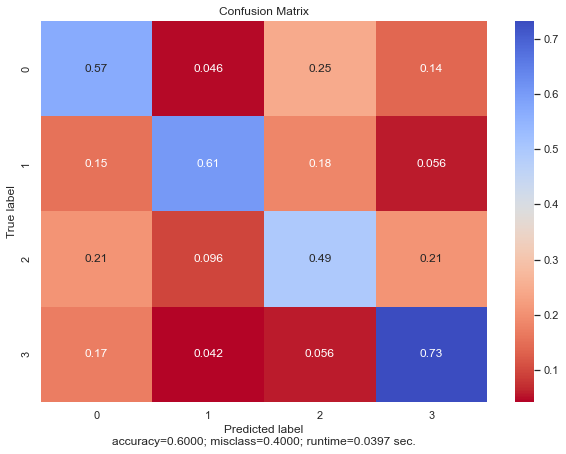

In [31]:
cmssvm = evaluator(test_y, ssvm_pred,runtime = runtime)

### PCA processed data

In [32]:
psvm_pipe = make_pipeline(sc, PCA(n_components = 0.95), LinearSVC(dual = False))

In [33]:
start = time.process_time()
psvm_pipe.fit(train_x, train_y)
psvm_pred = psvm_pipe.predict(test_x)
runtime = time.process_time() - start

              precision    recall  f1-score   support

           0       0.52      0.54      0.53        65
           1       0.50      0.42      0.46        71
           2       0.35      0.34      0.35        73
           3       0.50      0.58      0.54        71

    accuracy                           0.47       280
   macro avg       0.47      0.47      0.47       280
weighted avg       0.47      0.47      0.47       280



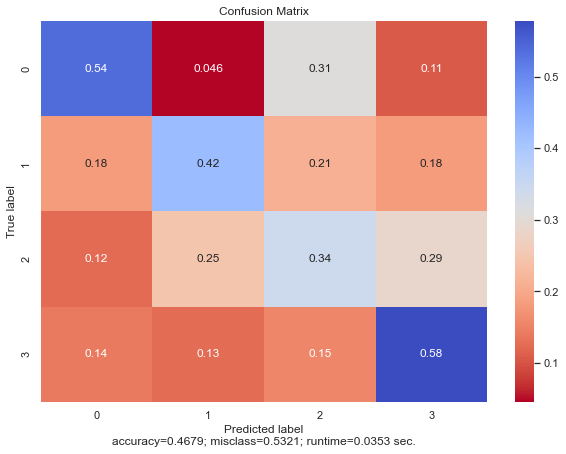

In [34]:
cmpsvm = evaluator(test_y, psvm_pred, runtime = runtime)

## Logistic Regression

### Full data - no standardization

In [35]:
lr_pipe = make_pipeline(LogisticRegression(dual = False))

In [36]:
start = time.process_time()
lr_pipe.fit(train_x, train_y)
lr_pred = lr_pipe.predict(test_x)
runtime = time.process_time() - start

              precision    recall  f1-score   support

           0       0.49      0.54      0.51        65
           1       0.73      0.65      0.69        71
           2       0.53      0.49      0.51        73
           3       0.67      0.73      0.70        71

    accuracy                           0.60       280
   macro avg       0.60      0.60      0.60       280
weighted avg       0.61      0.60      0.60       280



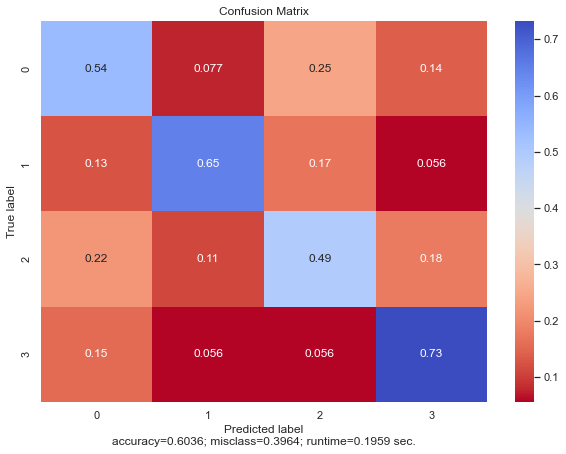

In [37]:
cmlr = evaluator(test_y, lr_pred, runtime = runtime)

### Full data - with standardization

In [38]:
slr_pipe = make_pipeline(sc, LogisticRegression(dual = False))

In [39]:
start = time.process_time()
slr_pipe.fit(train_x, train_y)
slr_pred = slr_pipe.predict(test_x)
runtime = time.process_time() - start

              precision    recall  f1-score   support

           0       0.49      0.52      0.51        65
           1       0.73      0.65      0.69        71
           2       0.54      0.51      0.52        73
           3       0.64      0.72      0.68        71

    accuracy                           0.60       280
   macro avg       0.60      0.60      0.60       280
weighted avg       0.60      0.60      0.60       280



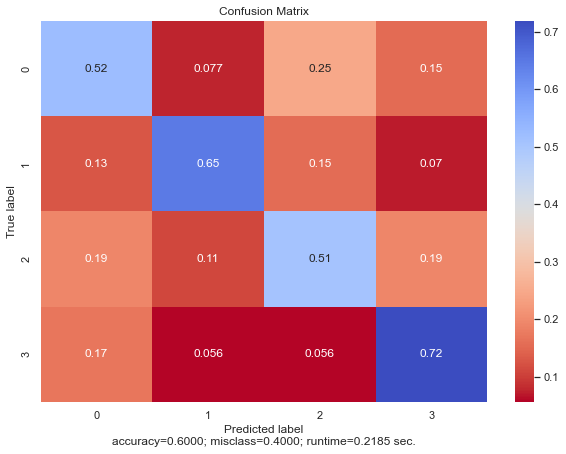

In [40]:
cmslr = evaluator(test_y, slr_pred, runtime = runtime)

### PCA processed data

In [41]:
plr_pipe = make_pipeline(sc, PCA(n_components = 0.95), LogisticRegression(dual = False))

In [42]:
start = time.process_time()
plr_pipe.fit(train_x, train_y)
plr_pred = plr_pipe.predict(test_x)
runtime = time.process_time() - start

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        65
           1       0.49      0.42      0.45        71
           2       0.35      0.36      0.35        73
           3       0.52      0.58      0.55        71

    accuracy                           0.47       280
   macro avg       0.47      0.47      0.47       280
weighted avg       0.47      0.47      0.47       280



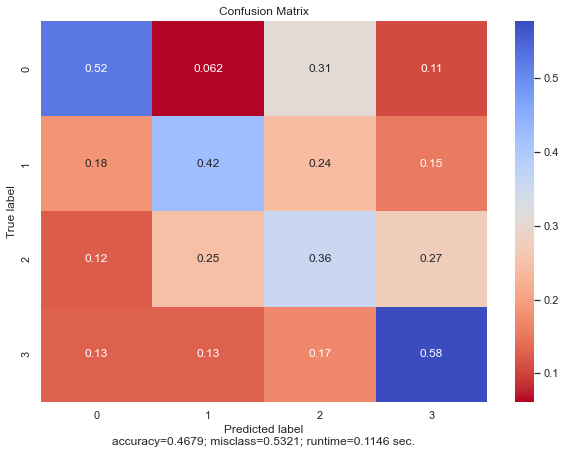

In [43]:
cmplr = evaluator(test_y, plr_pred, runtime = runtime)

## Initial considerations



LinearSVM is slightly outperformed by Logistic Regression but it's remarkably faster when dealing with standardized. This leads me to think that, if tuned properly, LinearSVM is going to be the overall better classifier.

__Considerations:__

- Just like we mentioned during the theoretical part of the course, LinearSVM performs better with standardized data. This is surely due to the nature of the method itself, which after standardization will have much closer outliers and so an easier time calculating the geometric margin.






- Counterintuitively (at least from my little experience), Logistic Regression performs a tiny bit better with non standardized data. Again, the methodology implemented in each model is crucial to understand performance under different circumstances: my intuition is that LR is more sensitive to outliers than SVM because the cost function of LR diverges faster than those of SVM, hence they're weighted more in the overall computation of the loss. 




- Naturally, the 30 feature dataset performs better than the dimensionally reduced dataset. The difference in accuracy is offsetted by a lower runtime (around 20% faster with LinSVM and 4 times faster with LR, accounting for the PCA reduction as well!): this difference can be disregarded in such a small dataset, but in bigger DS's, this feature reduction should be taken into consideration. It's worth mentioning that neither accuracy is remarkable, but they can be further improved through hyperparameter tuning.





- Could we have expected these differences in runtime? Logistic Regression and Linear SVM are fairly similar. Both form a decision boundary which linearly separates the feature vector hyperplanes. However, there are some key differences. SVM uses the Hinge loss function whereas Logistic Regression uses Logistic loss. We can make an assumption about LR taking longer due to datapoints being close to each other, hence making it harder to find the best decision boundary. Hinge loss is also easier to compute than Logistic loss and same for its derivative. Hinge loss can also be faster to train via SGD, since much of the time the gradient is 0, which will allow to not have to update the weights.


## Hyperparameter tuning - SVM

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C" : np.concatenate((np.linspace(0.0,5.0,num = 20),np.linspace(5.0,20.0,num = 15)), axis = None),
              "class_weight" : [None, "balanced"]}

g_search_svc = GridSearchCV(LinearSVC(dual = False), cv = 10, param_grid = param_grid,
                            refit = True,
                            scoring = 'f1_weighted',
                            return_train_score = True,
                            verbose = 1)

In [45]:
g_search_svc.fit(prep_train_x, train_y)
svm_params = g_search_svc.best_params_

Fitting 10 folds for each of 70 candidates, totalling 700 fits


/Users/joanvelja/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [       nan        nan 0.57586676 0.57410068 0.57402426 0.57054177
 0.57147454 0.56757202 0.57147456 0.5693148  0.57142434 0.57029073
 0.57154144 0.57058497 0.57246289 0.57058497 0.57246289 0.56873815
 0.57231439 0.56873815 0.56887891 0.56798577 0.56887891 0.567118
 0.56981778 0.567118   0.56981778 0.56804142 0.56898436 0.56804142
 0.568189   0.56804142 0.5673023  0.56894919 0.5673023  0.56894919
 0.56814026 0.56894919 0.56814026 0.56894919 0.56814026 0.56894919
 0.56814026 0.56894077 0.56904804 0.56703738 0.56904804 0.56703738
 0.56904804 0.56703738 0.56708625 0.56792954 0.56622863 0.56792954
 0.56623968 0.56790664 0.56626228 0.56878384 0.56626228 0.56878384
 0.56626228 0.56878384 0.56626228 0.56878384 0.56626228 0.56878384
 0.56626228 0.56878384 0.56624394 0.56877526]

/Users/joanvelja/opt/anaconda3/lib/python3.9/site-packages

In [46]:
svm_params

{'C': 0.2631578947368421, 'class_weight': None}

In [47]:
g_svm_pipe = make_pipeline(sc, LinearSVC(**svm_params))

In [48]:
start = time.process_time()
g_svm_pipe.fit(train_x, train_y)
g_svm_pred = g_svm_pipe.predict(test_x)
runtime = time.process_time() - start

              precision    recall  f1-score   support

           0       0.49      0.57      0.53        65
           1       0.77      0.65      0.70        71
           2       0.55      0.49      0.52        73
           3       0.66      0.73      0.69        71

    accuracy                           0.61       280
   macro avg       0.62      0.61      0.61       280
weighted avg       0.62      0.61      0.61       280



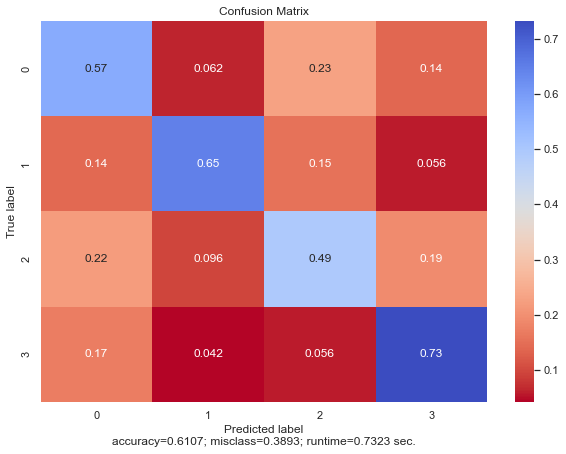

In [49]:
cmoptsvm = evaluator(test_y, g_svm_pred, runtime = runtime)

In [50]:
g_search_psvc = sklearn.clone(g_search_svc)
g_search_psvc.fit(transf_train_x, train_y)
psvm_params = g_search_svc.best_params_

Fitting 10 folds for each of 70 candidates, totalling 700 fits


/Users/joanvelja/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [       nan        nan 0.47144583 0.47423367 0.47144583 0.47423367
 0.47144583 0.47534241 0.47144583 0.47534241 0.47144583 0.47534241
 0.47144583 0.47534241 0.47144583 0.47534241 0.47144583 0.47534241
 0.47144583 0.47534241 0.47144583 0.47534241 0.47144583 0.47534241
 0.47144583 0.47534241 0.47144583 0.47534241 0.47144583 0.47534241
 0.47137493 0.47534241 0.47137493 0.47534241 0.47137493 0.47534241
 0.47137493 0.47534241 0.47137493 0.47534241 0.47137493 0.47534241
 0.47137493 0.47534241 0.47137493 0.47534241 0.47137493 0.47534241
 0.47137493 0.47534241 0.47137493 0.47534241 0.47137493 0.47534241
 0.47137493 0.47534241 0.47137493 0.47534241 0.47137493 0.47534241
 0.47137493 0.47534241 0.47137493 0.47534241 0.47137493 0.47534241
 0.47137493 0.47534241 0.47137493 0.47534241]

/Users/joanvelja/opt/anaconda3/lib/python3.9/site-packag

In [51]:
psvm_params

{'C': 0.2631578947368421, 'class_weight': None}

In [52]:
g_psvm_pipe = make_pipeline(LinearSVC(**psvm_params))

In [53]:
start = time.process_time()
g_psvm_pipe.fit(transf_train_x, train_y)
g_psvm_pred = g_psvm_pipe.predict(transf_test_x)
runtime = time.process_time() - start

              precision    recall  f1-score   support

           0       0.52      0.54      0.53        65
           1       0.50      0.42      0.46        71
           2       0.35      0.34      0.35        73
           3       0.50      0.58      0.54        71

    accuracy                           0.47       280
   macro avg       0.47      0.47      0.47       280
weighted avg       0.47      0.47      0.47       280



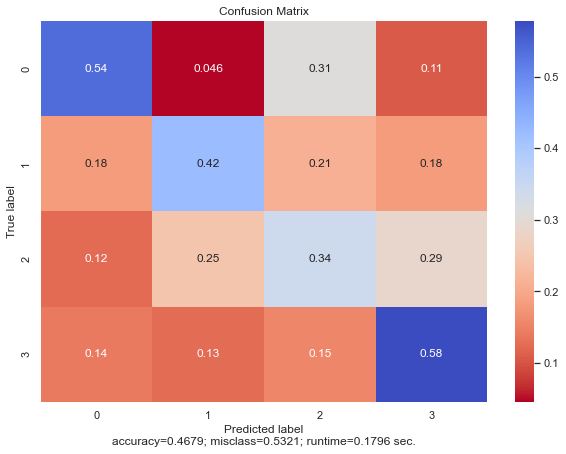

In [54]:
cmoptpsvm = evaluator(test_y, g_psvm_pred, runtime = runtime)

## Hyperparameters tuning - Logistic Regression

In [55]:
param_grid = {
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              "class_weight" : [None, "balanced"],
               "solver" : ["newton-cg", "lbfgs", "liblinear"]
             }

g_search_lr = GridSearchCV(LogisticRegression(dual = False), cv = 10, param_grid = param_grid,
                            refit = True,
                            scoring = 'f1_weighted',
                            return_train_score = True,
                            verbose = 1)

In [56]:
g_search_lr.fit(train_x, train_y)
lr_params = g_search_lr.best_params_

Fitting 10 folds for each of 42 candidates, totalling 420 fits


In [57]:
lr_params

{'C': 0.1, 'class_weight': None, 'solver': 'newton-cg'}

In [58]:
g_lr_pipe = make_pipeline(LogisticRegression(**lr_params))

In [59]:
start = time.process_time()
g_lr_pipe.fit(train_x, train_y)
g_lr_pred = g_lr_pipe.predict(test_x)
runtime = time.process_time() - start

              precision    recall  f1-score   support

           0       0.49      0.54      0.51        65
           1       0.74      0.65      0.69        71
           2       0.52      0.49      0.51        73
           3       0.65      0.72      0.68        71

    accuracy                           0.60       280
   macro avg       0.60      0.60      0.60       280
weighted avg       0.60      0.60      0.60       280



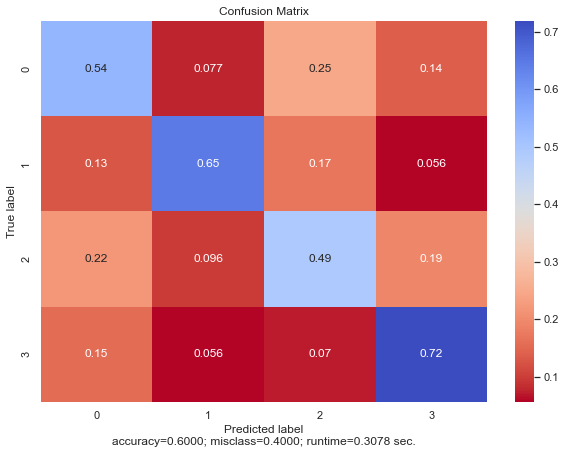

In [60]:
cmoptlr = evaluator(test_y, g_lr_pred, runtime = runtime)

In [61]:
g_search_plr = sklearn.clone(g_search_lr)
g_search_plr.fit(transf_train_x, train_y)
plr_params = g_search_lr.best_params_

Fitting 10 folds for each of 42 candidates, totalling 420 fits


In [62]:
plr_params

{'C': 0.1, 'class_weight': None, 'solver': 'newton-cg'}

In [63]:
g_plr_pipe = make_pipeline(LogisticRegression(**plr_params))

In [64]:
start = time.process_time()
g_plr_pipe.fit(transf_train_x, train_y)
g_plr_pred = g_plr_pipe.predict(transf_test_x)
runtime = time.process_time() - start

              precision    recall  f1-score   support

           0       0.51      0.51      0.51        65
           1       0.49      0.44      0.46        71
           2       0.35      0.36      0.35        73
           3       0.53      0.58      0.55        71

    accuracy                           0.47       280
   macro avg       0.47      0.47      0.47       280
weighted avg       0.47      0.47      0.47       280



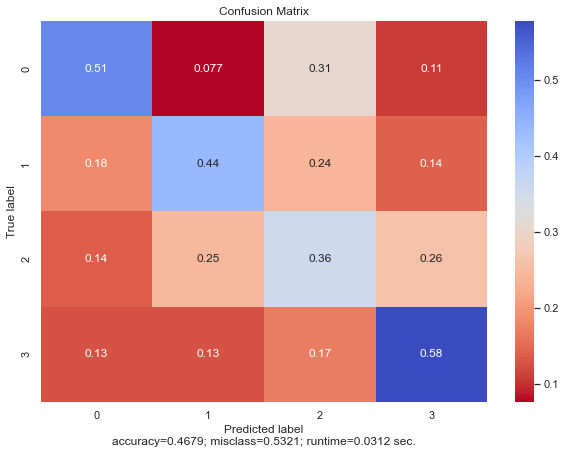

In [65]:
cmoptplr = evaluator(test_y, g_plr_pred, runtime = runtime)

## Comparing the models

In [66]:
from sklearn.model_selection import cross_val_score

# this cell might take few seconds to run

lin_svc_scores = cross_val_score(svm_pipe, prep_train_x, train_y, scoring = 'f1_weighted', cv = 10)
opt_svc_scores = cross_val_score(g_svm_pipe, prep_train_x, train_y, scoring = 'f1_weighted', cv = 10)

pca_svc_scores = cross_val_score(psvm_pipe, transf_train_x, train_y, scoring = 'f1_weighted', cv = 10)
optpca_svc_scores = cross_val_score(g_psvm_pipe, transf_train_x, train_y, scoring = 'f1_weighted', cv = 10)

lr_scores = cross_val_score(lr_pipe, train_x, train_y, scoring = 'f1_weighted', cv = 10)
lr_opt_scores = cross_val_score(g_lr_pipe, train_x, train_y, scoring = 'f1_weighted', cv = 10)

pca_lr_scores = cross_val_score(plr_pipe, transf_train_x, train_y, scoring = 'f1_weighted', cv = 10)
optpca_lr_scores = cross_val_score(g_plr_pipe, transf_train_x, train_y, scoring = 'f1_weighted', cv = 10)

In [67]:
scores = [lin_svc_scores, opt_svc_scores, lr_scores, lr_opt_scores]
labels = ["lin_svc", "opt_lin_svc", "log_reg", "opt_log_reg"]

def compare_scores(labels, scores, title, cv = 10):
    plt.figure(figsize=(12,6))
    for i in range(len(scores)):
        plt.plot([i]*cv, scores[i],'.')
    sns.boxplot(data = pd.DataFrame(np.array(scores).T, columns = labels), palette = 'coolwarm_r').set(title = title, ylabel = "weighted F1")

    plt.show()

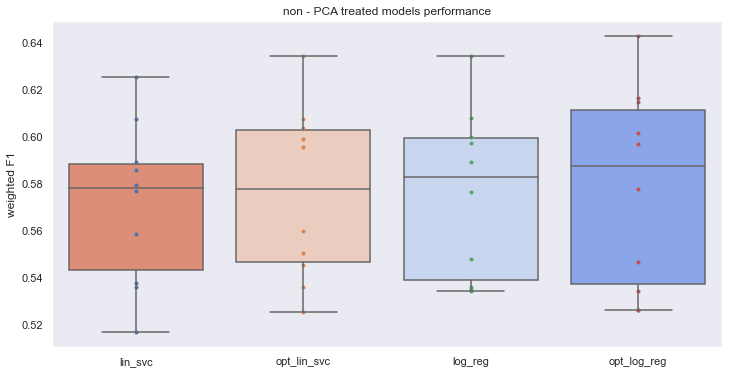

In [68]:
sns.set_style("dark")
compare_scores(labels, scores, "non - PCA treated models performance")

In [69]:
scores = [pca_svc_scores, optpca_svc_scores, pca_lr_scores, optpca_lr_scores] # PCA models hyperparameter tuning

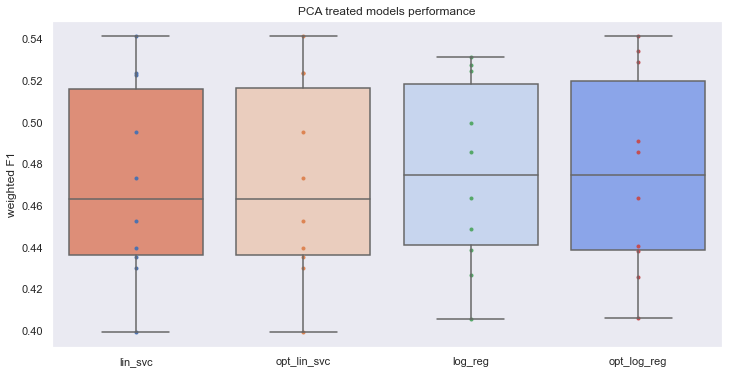

In [70]:
sns.set_style("dark")
compare_scores(labels, scores, "PCA treated models performance")

## Conclusion

We managed to tune hyperparameters through GridSearchCV for our desired functions. The graphs above show the overall improvement after tuning evaluated through cross validation over the training set. Let us draw some conlcusions about the performances we evaluated so far:

- None of the models implemented did not reach a high level of accuracy. This is due to __underfitting__, which is difficult to deal with basic models such as Logistic Regression and LinearSVM. Different configurations of C (regularization hyperparameter) have been tried, without increasing significantly the scores. More complex models such as __SVM__ and __Random Forest__ should perform better on this dataset.




- Speaking of underfitting, the features are highly correlated, baiting the user into thinking that the feature set is large enough. As seen above, 95% of the variability is attained by just __9 components__, making the data maybe a little too simple to evaluate patterns and making prediction. 



- From the graphs above, on average, Logistic Regression has a higher f1_score on the training set, but falls short on the generalization through the test set. LR is also less consistent _on average_. Linear SVM generalizes better and is also as we saw before a lot faster (the higher runtime in the generalization can be blamed on the regularization being a lot higher). Further evaluation shall be made when dealing with larger datasets, but under these conditions, LinearSVM performs better, and, letting aside hyperparameter tuning, it's faster as well.


- When using PCA reduced data, Logistic Regression and LinearSVM generalize at the exact same score but through CV on the training set, Logistic Regression is more consistent and has a higher _average_ score.



## Extra: evaluating the performance with different models

In [71]:
#pip install xgboost

----- Estimating performance with SVM Classifier-----
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        65
           1       0.70      0.62      0.66        71
           2       0.55      0.63      0.59        73
           3       0.69      0.66      0.68        71

    accuracy                           0.62       280
   macro avg       0.63      0.62      0.63       280
weighted avg       0.63      0.62      0.63       280



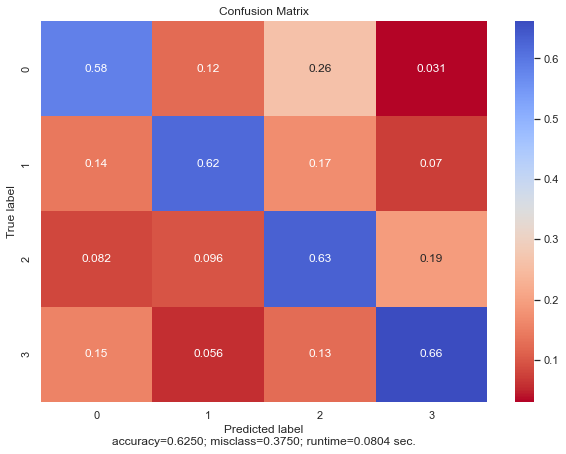

----- Estimating performance with GB Classifier-----
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        65
           1       0.51      0.54      0.52        71
           2       0.42      0.41      0.41        73
           3       0.58      0.54      0.55        71

    accuracy                           0.51       280
   macro avg       0.51      0.51      0.51       280
weighted avg       0.51      0.51      0.51       280



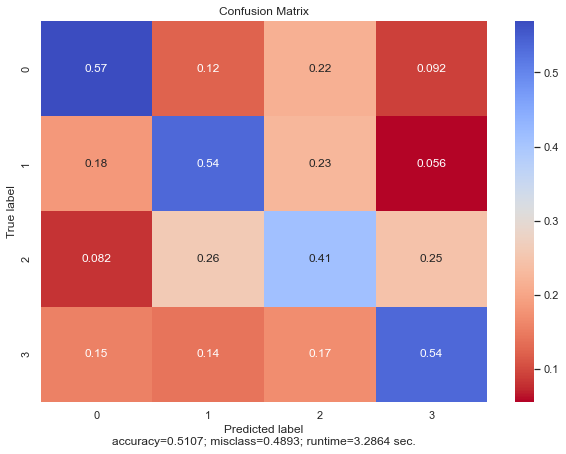

----- Estimating performance with RandomForestClassifier-----
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        65
           1       0.60      0.62      0.61        71
           2       0.54      0.53      0.54        73
           3       0.65      0.59      0.62        71

    accuracy                           0.59       280
   macro avg       0.59      0.59      0.59       280
weighted avg       0.59      0.59      0.59       280



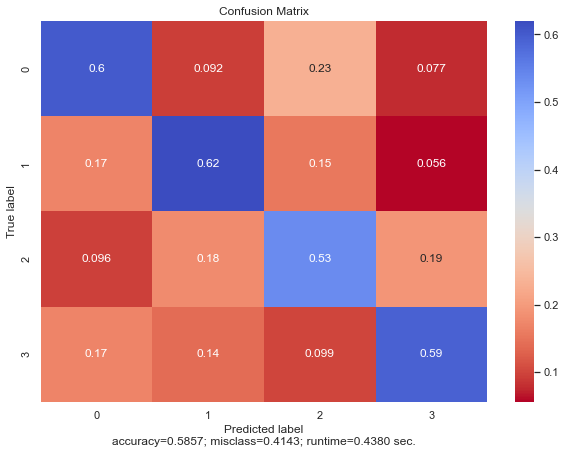

----- Estimating performance with K-Nearest Neighbours Classsifier-----
              precision    recall  f1-score   support

           0       0.48      0.71      0.57        65
           1       0.57      0.65      0.61        71
           2       0.57      0.48      0.52        73
           3       0.79      0.46      0.58        71

    accuracy                           0.57       280
   macro avg       0.60      0.57      0.57       280
weighted avg       0.60      0.57      0.57       280



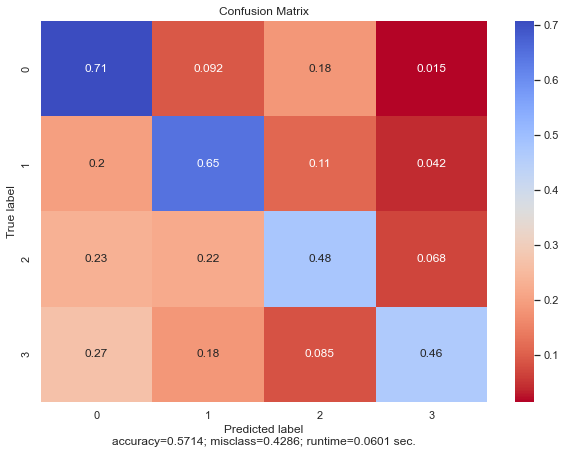

----- Estimating performance with XGB-----
              precision    recall  f1-score   support

           0       0.51      0.57      0.54        65
           1       0.60      0.56      0.58        71
           2       0.49      0.51      0.50        73
           3       0.64      0.58      0.61        71

    accuracy                           0.55       280
   macro avg       0.56      0.55      0.55       280
weighted avg       0.56      0.55      0.55       280



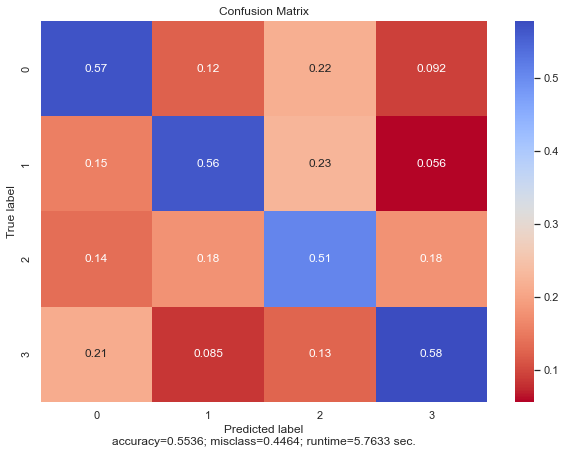

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {"SVM Classifier" : SVC(),
        "GB Classifier" : GradientBoostingClassifier(),
        "RandomForestClassifier" : RandomForestClassifier(),
       "K-Nearest Neighbours Classsifier" : KNeighborsClassifier(),
       "XGB" : XGBClassifier()}


for estimator in models:
    print(f"----- Estimating performance with {estimator}-----")
    start = time.process_time()
    est = models[estimator].fit(prep_train_x, train_y)
    pred = est.predict(prep_test_x)
    runtime = time.process_time() - start
    cm = evaluator(test_y, pred, runtime = runtime)


The highest f1_score is attained by (unsurprisingly) SVM, which is also the second faster to run.